In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Self Play Plot

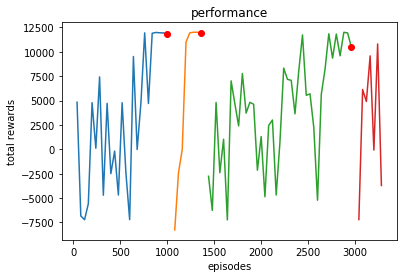

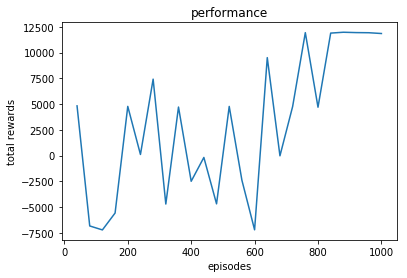

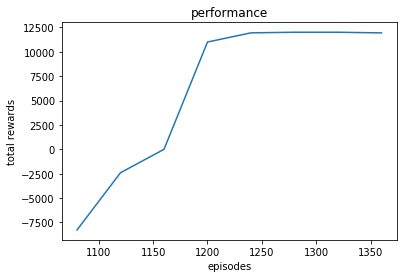

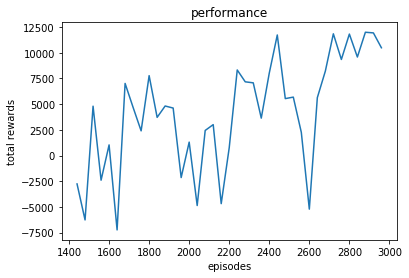

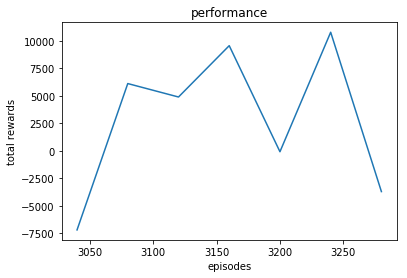

In [2]:
def plot(x, y, fig, style = '-'):
    
    plt.plot(x, y, style)
    plt.title('performance')
#     plt.legend(legend)
    plt.xlabel("episodes")
    plt.ylabel("total rewards")
    return plt
#     plt.show()
    
def readResult(filename, train_episode = 40):
    x_reward = []
    y_reward = []
    x_update = []
    y_update = []
    x_seperate = []
    y_seperate = []
    seperate_i = 0
    seperate_j = 0
    
    x_seperate.append([])
    y_seperate.append([])
    f = open(filename, 'r')
    lines = f.readlines()
    for i,l in enumerate(lines):
        if l == "Update agent\n":
            seperate_i += 1
            seperate_j += 1
            x_seperate.append([])
            y_seperate.append([])
            y_update.append(y_reward[-1])
            x_update.append(x_reward[-1])
        else:
            y_reward.append(float(l[0:-1]))
            x_reward.append((i + 1) * train_episode)
            
            y_seperate[seperate_j].append(float(l[0:-1]))
            x_seperate[seperate_i].append(((i + 1) * train_episode))
    return x_reward, y_reward,x_update, y_update, x_seperate, y_seperate

def mean(y):
    meany = []
    sum = 0
    for i, v in enumerate(y):
        sum += v
        meany.append(sum / (i + 1))
    return meany
""
fig_num = 1
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("results/sadq_self_play_2.txt")
# my = mean(y)
for i in range(len(x_seperate)):
    plot(x_seperate[i], y_seperate[i], fig)
plot(x_update, y_update, fig, style = 'ro')
# fig.show()
# plot(x,my, ["withOnehotAndNormalize","mean"], fig = 3)
for i in range(len(x_seperate)):
    fig_num += 1
    fig = plt.figure(num = fig_num)
    plot(x_seperate[i], y_seperate[i], fig)

## Close Dot Plot